# MINOR PROJECT -- Cricket Score Predictor (using Machine Learning)
## 3) Model Training

In [1]:
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt ## fpr plotting roc curve and confusion matrix
from sklearn.metrics import roc_curve, roc_auc_score

/home/nakshatra/.local/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score,mean_absolute_error



# (1) For t20's

In [7]:
## loading the dataframe in df from level 3 pickle file
final_df = pickle.load(open('dataset_level3.pkl','rb'))

In [8]:
X = final_df.drop(columns=['runs_x'])
y = final_df['runs_x']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

# (2) For ODI's

In [9]:
## loading the dataframe in df_odi from level 3_odi pickle file
final_df_odi = pickle.load(open('dataset_level3_odi.pkl','rb'))

In [10]:
X_odi = final_df_odi.drop(columns=['runs_x'])
y_odi = final_df_odi['runs_x']
from sklearn.model_selection import train_test_split
X_odi_train,X_odi_test,y_odi_train,y_odi_test = train_test_split(X_odi,y_odi,test_size=0.2,random_state=1)

In [11]:
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')



# Model - XGBoost

# (1) t20's

In [13]:
# Creating a pipeline for XGBoost Regression
XGBoost_pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',XGBRegressor(n_estimators=1000,learning_rate=0.2,max_depth=12,random_state=1))
])



In [138]:
XGBoost_pipe.fit(X_train,y_train)
y_pred_XGBoost = XGBoost_pipe.predict(X_test)
print("R2 Score:", r2_score(y_test,y_pred_XGBoost))
print("Mean Absolute Error:", mean_absolute_error(y_test,y_pred_XGBoost))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 Score: 0.9434275177321778
Mean Absolute Error: 3.0282814825987585


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


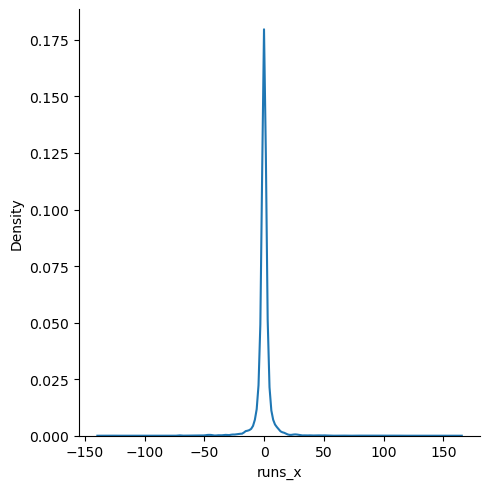

In [139]:
#creates a seaborn distribution plot (displot) to visualize the distribution of the residuals 
#(the differences between predicted values and actual values) resulting from a XGBoost regression model.
sns.displot(y_pred_XGBoost-y_test, kind= 'kde')

In [140]:
pickle.dump(XGBoost_pipe,open('XGBoost_pipe.pkl','wb'))

# (2) ODI'S

In [17]:
# Creating a pipeline for XGBoost Regression
XGBoost_odi_pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',XGBRegressor(n_estimators=1000,learning_rate=0.2,max_depth=12,random_state=1))
])


In [18]:
XGBoost_odi_pipe.fit(X_odi_train,y_odi_train)
y_odi_pred_XGBoost = XGBoost_pipe.predict(X_odi_test)
print("R2 Score:", r2_score(y_odi_test,y_odi_pred_XGBoost))
print("Mean Absolute Error:", mean_absolute_error(y_odi_test,y_odi_pred_XGBoost))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 Score: 0.9564600161917635
Mean Absolute Error: 4.732403437786323


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


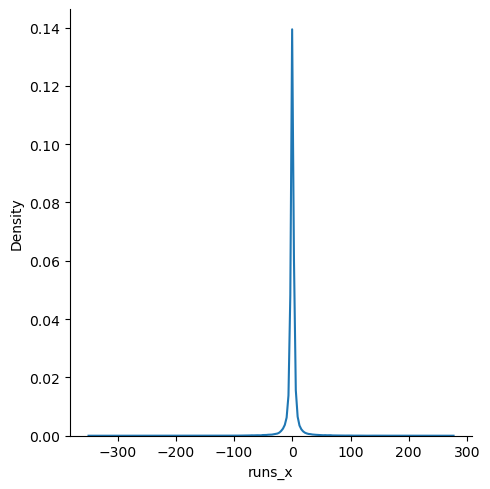

In [19]:
#creates a seaborn distribution plot (displot) to visualize the distribution of the residuals 
#(the differences between predicted values and actual values) resulting from a XGBoost regression model.
sns.displot(y_odi_pred_XGBoost-y_odi_test, kind= 'kde')

In [20]:
pickle.dump(XGBoost_odi_pipe,open('XGBoost_odi_pipe.pkl','wb'))

# Model Randome Forest

# (1) t20's

In [28]:
# Creating a pipeline for Random Forest Regression
RandomForest_pipe = Pipeline(steps=[
    ('step1', trf),  # Assuming trf is a transformer or preprocessing step
    ('step2', StandardScaler()),  # StandardScaler step
    ('step3', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=1))  # RandomForestRegressor
])


In [29]:
# Fit the Random Forest pipeline on the training data
RandomForest_pipe.fit(X_train, y_train)

# Predict using the Random Forest pipeline on the test data
y_pred_RandomForest = RandomForest_pipe.predict(X_test)

# Evaluate the performance of Random Forest using r2_score and mean_absolute_error
print("R2 Score:", r2_score(y_test, y_pred_RandomForest))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_RandomForest))


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 Score: 0.6623624362439877
Mean Absolute Error: 13.272284907792967


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


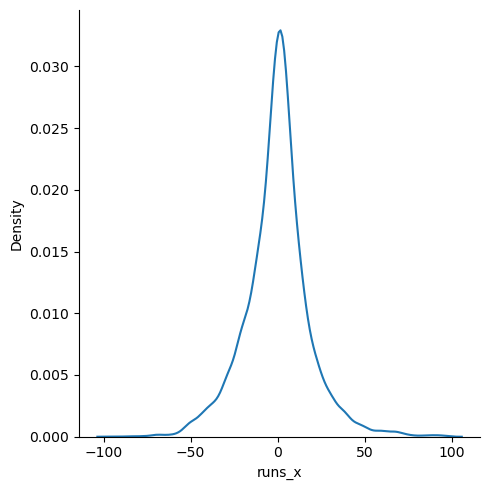

In [30]:
#creates a seaborn distribution plot (displot) to visualize the distribution of the residuals 
#(the differences between predicted values and actual values) resulting from a RandomForest regression model.
sns.displot(y_pred_RandomForest-y_test, kind= 'kde')

# (2) ODI's

In [31]:
# Creating a pipeline for Random Forest Regression
RandomForest_odi_pipe = Pipeline(steps=[
    ('step1', trf),  # Assuming trf is a transformer or preprocessing step
    ('step2', StandardScaler()),  # StandardScaler step
    ('step3', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=1))  # RandomForestRegressor
])


In [33]:
# Fit the Random Forest pipeline on the training data
RandomForest_odi_pipe.fit(X_odi_train, y_odi_train)

# Predict using the Random Forest pipeline on the test data
y_odi_pred_RandomForest = RandomForest_odi_pipe.predict(X_odi_test)

# Evaluate the performance of Random Forest using r2_score and mean_absolute_error
print("R2 Score:", r2_score(y_odi_test, y_odi_pred_RandomForest))
print("Mean Absolute Error:", mean_absolute_error(y_odi_test, y_odi_pred_RandomForest))


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 Score: 0.5450997971121971
Mean Absolute Error: 29.8672686882189


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


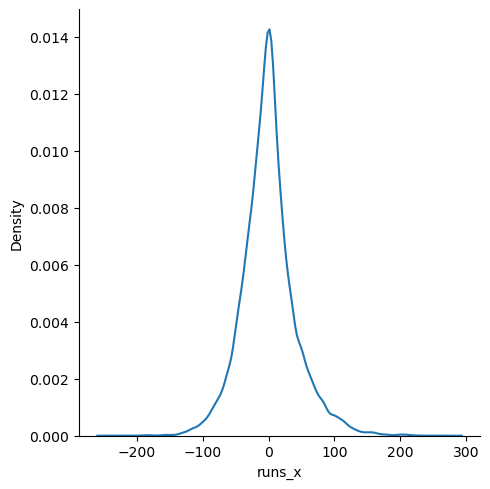

In [34]:
#creates a seaborn distribution plot (displot) to visualize the distribution of the residuals 
#(the differences between predicted values and actual values) resulting from a RandomForest regression model.
sns.displot(y_odi_pred_RandomForest-y_odi_test, kind= 'kde')

# Model - LinearRegression

# (1) t20's

In [144]:
# Creating a pipeline for Linear Regression
LinearRegression_pipe = Pipeline(steps=[
    ('step1', trf),  # Assuming trf is a transformer or preprocessing step
    ('step2', StandardScaler()),  # StandardScaler step
    ('step3', LinearRegression())  # Linear Regression
])

# Fit the Random Forest pipeline on the training data
LinearRegression_pipe.fit(X_train, y_train)

# Predict using the Random Forest pipeline on the test data
y_pred_LinearRegression = LinearRegression_pipe.predict(X_test)
# Evaluate the performance of Linear Regression using r2_score and mean_absolute_error
print("R2 Score:", r2_score(y_test, y_pred_LinearRegression))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_LinearRegression))

R2 Score: 0.56432549295735
Mean Absolute Error: 15.920376801155234


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


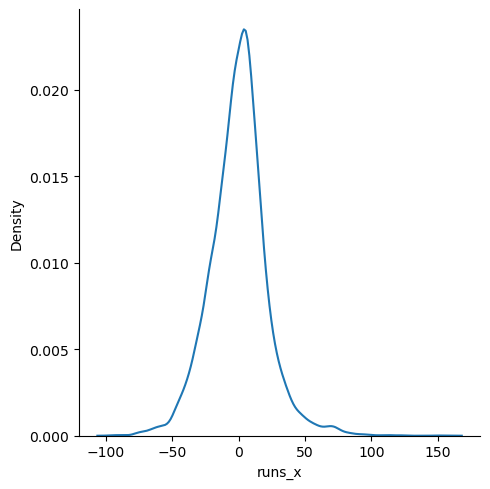

In [145]:
#creates a seaborn distribution plot (displot) to visualize the distribution of the residuals 
#(the differences between predicted values and actual values) resulting from a LinearRegression model.
sns.displot(y_pred_LinearRegression-y_test, kind= 'kde')

# (2) ODI's

In [35]:
# Creating a pipeline for Linear Regression
LinearRegression_odi_pipe = Pipeline(steps=[
    ('step1', trf),  # Assuming trf is a transformer or preprocessing step
    ('step2', StandardScaler()),  # StandardScaler step
    ('step3', LinearRegression())  # Linear Regression
])

# Fit the Random Forest pipeline on the training data
LinearRegression_odi_pipe.fit(X_odi_train, y_odi_train)

# Predict using the Random Forest pipeline on the test data
y_odi_pred_LinearRegression = LinearRegression_odi_pipe.predict(X_odi_test)
# Evaluate the performance of Linear Regression using r2_score and mean_absolute_error
print("R2 Score:", r2_score(y_odi_test, y_odi_pred_LinearRegression))
print("Mean Absolute Error:", mean_absolute_error(y_odi_test, y_odi_pred_LinearRegression))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 Score: 0.37951616813379463
Mean Absolute Error: 36.361935264526096


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


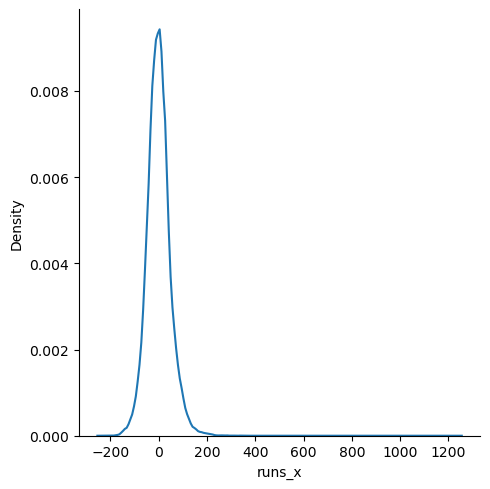

In [36]:
#creates a seaborn distribution plot (displot) to visualize the distribution of the residuals 
#(the differences between predicted values and actual values) resulting from a LinearRegression model.
sns.displot(y_odi_pred_LinearRegression-y_odi_test, kind= 'kde')

# Scatter plot for all three used models

# (1) For t20's

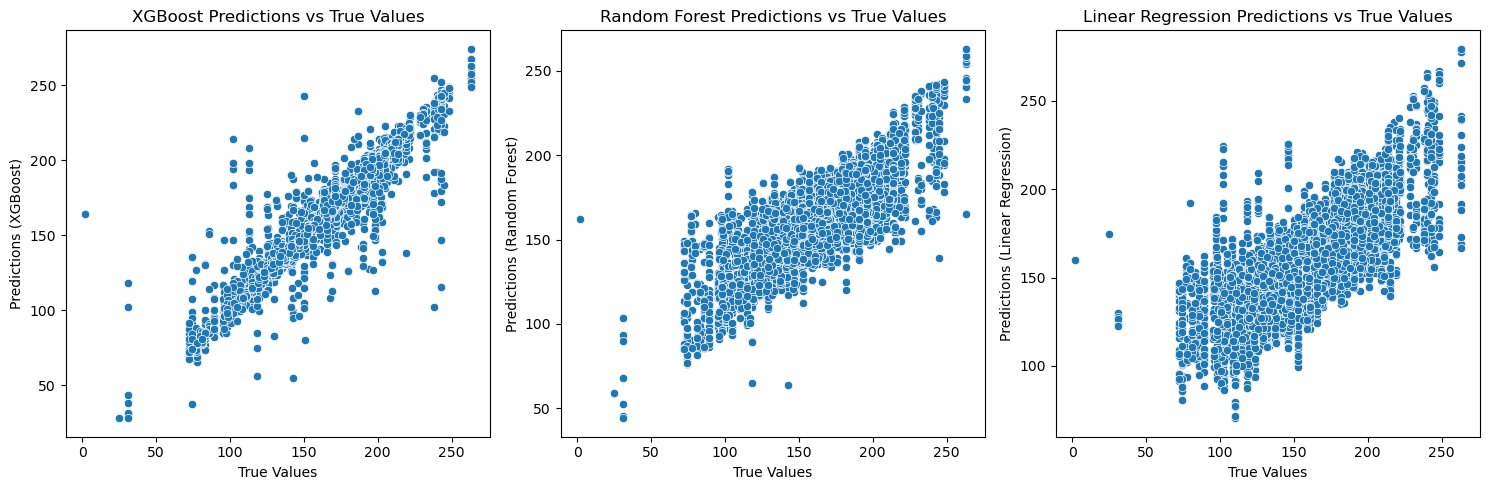

In [146]:
# Plot scatter plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=y_pred_XGBoost)
plt.xlabel('True Values')
plt.ylabel('Predictions (XGBoost)')
plt.title('XGBoost Predictions vs True Values')

plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test, y=y_pred_RandomForest)
plt.xlabel('True Values')
plt.ylabel('Predictions (Random Forest)')
plt.title('Random Forest Predictions vs True Values')

plt.subplot(1, 3, 3)
sns.scatterplot(x=y_test, y=y_pred_LinearRegression)
plt.xlabel('True Values')
plt.ylabel('Predictions (Linear Regression)')
plt.title('Linear Regression Predictions vs True Values')

plt.tight_layout()
plt.show()

# (2) For ODI's

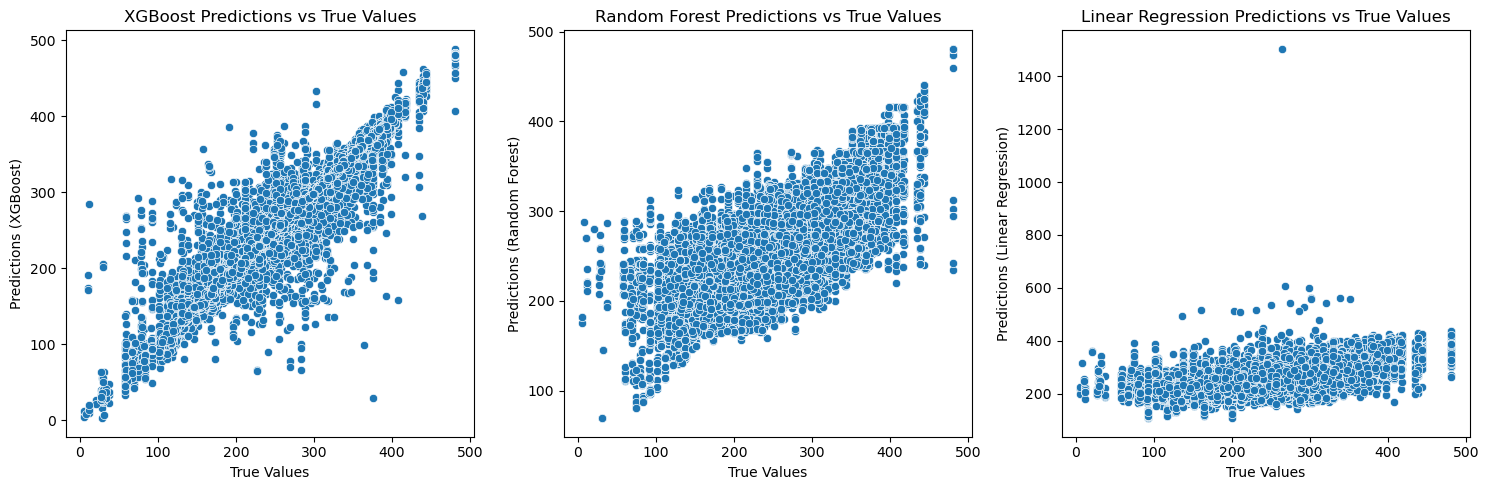

In [37]:
# Plot scatter plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=y_odi_test, y=y_odi_pred_XGBoost)
plt.xlabel('True Values')
plt.ylabel('Predictions (XGBoost)')
plt.title('XGBoost Predictions vs True Values')

plt.subplot(1, 3, 2)
sns.scatterplot(x=y_odi_test, y=y_odi_pred_RandomForest)
plt.xlabel('True Values')
plt.ylabel('Predictions (Random Forest)')
plt.title('Random Forest Predictions vs True Values')

plt.subplot(1, 3, 3)
sns.scatterplot(x=y_odi_test, y=y_odi_pred_LinearRegression)
plt.xlabel('True Values')
plt.ylabel('Predictions (Linear Regression)')
plt.title('Linear Regression Predictions vs True Values')

plt.tight_layout()
plt.show()